## UZOP PROJEKT - DRUGI DIO
# Priprema i vizualizacija podataka

**Napravili:**
Tea Ćetojević Tisaj, 0036541193



**Opis skupa podataka:**

Skup podataka "Wisconsin Diagnostic Breast Cancer" (WDBC) preuzet je s https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic i koristi se za dijagnosticiranje raka dojke. Podaci uključuju 568 instanci i 32 atributa, od kojih je jedan atribut dijagnoza (M za maligni i B za benigni), dok preostalih 30 atributa predstavljaju numeričke značajke koje opisuju karakteristike jezgri stanica na temelju slika tkiva dojke prikupljenih iz fine iglične aspiracije (FNA). Ovaj skup podataka omogućuje razvoj i testiranje modela za prepoznavanje i klasifikaciju tumora dojke.

#### Učitavanje podataka


Podatkovni skup učitavamo iz CSV dokumenta pomoću pandas bibilioteke.

In [292]:
import pandas as pd

X = pd.read_csv("project_data/wdbc.data")

In [293]:
X.shape

(568, 32)

In [294]:
X.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [295]:
print(X.columns)


Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')


S obzirom na to da u originalnom skupu podataka nisu bila uključena imena stupaca, sami smo ih dodali kako bismo unaprijedili razumljivost podataka. Na taj način olakšavamo prepoznavanje značenja svake značajke, što značajno poboljšava kvalitetu analize i obrade podataka.

In [296]:
column_names = [
    'id_number', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
    'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'worst_radius', 'worst_texture', 'worst_perimeter',
    'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry',
    'worst_fractal_dimension'
]
X.columns = column_names



In [297]:
X.shape

(568, 32)

In [298]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_number                568 non-null    int64  
 1   diagnosis                568 non-null    object 
 2   mean_radius              568 non-null    float64
 3   mean_texture             568 non-null    float64
 4   mean_perimeter           568 non-null    float64
 5   mean_area                568 non-null    float64
 6   mean_smoothness          568 non-null    float64
 7   mean_compactness         568 non-null    float64
 8   mean_concavity           568 non-null    float64
 9   mean_concave_points      568 non-null    float64
 10  mean_symmetry            568 non-null    float64
 11  mean_fractal_dimension   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

**Pojašnjenje značajki**

ID number: Predstavlja jedinstveni identifikator za svaki uzorak u skupu podataka. 

Diagnosis: Označava dijagnozu uzorka. Vrijednosti mogu biti: 
                                                 M: Maligni (rak)
                                                 B: Benigni (dobroćudni)

Značajke (3-32): Predstavljaju realne vrijednosti koje se računaju za svaki nukleus stanice iz digitalizirane slike uzorka. Svaka značajka opisuje određene karakteristike stanica i njihovih kontura u slikama. Tri glavne skupine značajki uključuju:
                                                 Mean (Srednja vrijednost): Srednja vrijednost karakteristika (npr. srednji radius, srednja tekstura, itd.)
                                                 Standard Error (SE): Standardna pogreška karakteristika (npr. SE radiusa, SE teksture, itd.)
                                                 Worst (Najgore): Najveće vrijednosti karakteristika koje se temelje na tri najveće vrijednosti svake značajke (npr. najgori radius, najgora tekstura, itd.)

In [299]:
X.columns.values

array(['id_number', 'diagnosis', 'mean_radius', 'mean_texture',
       'mean_perimeter', 'mean_area', 'mean_smoothness',
       'mean_compactness', 'mean_concavity', 'mean_concave_points',
       'mean_symmetry', 'mean_fractal_dimension', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se',
       'symmetry_se', 'fractal_dimension_se', 'worst_radius',
       'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry',
       'worst_fractal_dimension'], dtype=object)

In [300]:
X.isna().sum()

id_number                  0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

U ovom skupu podataka svi atributi imaju potpune vrijednosti, što znači da nema nedostajućih vrijednosti u niti jednom od stupaca. 

#### Provjera stršećih podataka

In [301]:
X.describe()

,id_number,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Na prvi pogled možemo zaključiti da bi stršeći podaci mogli biti u area_mean i area_worst značajkama.

Provjerimo prvo raspršenje vrijednosti za značajku area_mean

In [302]:
print('area_mean > 300: ', (X.mean_area> 300).sum())
print('area_mean > 500: ', (X.mean_area > 500).sum())
print('area_mean > 600: ', (X.mean_area > 600).sum())
print('area_mean > 800: ', (X.mean_area > 800).sum())
print('area_mean > 1000: ', (X.mean_area > 1000).sum())
print('area_mean > 2000: ', (X.mean_area > 2000).sum())

area_mean > 300:  523
area_mean > 500:  338
area_mean > 600:  233
area_mean > 800:  136
area_mean > 1000:  91
area_mean > 2000:  4


In [303]:
X.loc[X.mean_area > 2000, 'mean_area']

179    2250.0
211    2499.0
351    2010.0
460    2501.0
Name: mean_area, dtype: float64

Za četiri instance vrijednost area_mean prelazi 2000, njih ćemo izbaciti.

In [304]:
X.drop([179,211,351,460], axis=0, inplace=True)


In [305]:
X.loc[X.mean_area > 2000, 'mean_area']

Series([], Name: mean_area, dtype: float64)

Ponovimo isto za značajku area_worst

In [306]:
print('worst_area > 300: ', (X.worst_area > 300).sum())
print('worst_area > 500: ', (X.worst_area > 500).sum())
print('worst_area > 800: ', (X.worst_area > 800).sum())
print('worst_area > 1000: ', (X.worst_area > 1000).sum())
print('worst_area > 2000: ', (X.worst_area > 2000).sum())
print('worst_area > 3000: ', (X.worst_area > 3000).sum())
print('worst_area > 4000: ', (X.worst_area > 4000).sum())


worst_area > 300:  547
worst_area > 500:  434
worst_area > 800:  216
worst_area > 1000:  148
worst_area > 2000:  25
worst_area > 3000:  2
worst_area > 4000:  0


In [307]:
X.loc[X.worst_area > 3000, 'worst_area']

264    3432.0
367    3143.0
Name: worst_area, dtype: float64

Dvije instance prelaze vrijednost od 3000 za značajku area_worst, njih ćemo izbaciti.

In [308]:
X.drop([264,367], axis=0, inplace=True)

Značajka dijagnoza je jedina koja nije u numeričkom formatu, stoga ćemo je pretvoriti u numeričke vrijednosti koristeći metodu LabelEncoder. Na taj način ćemo omogućiti daljnju analizu i modeliranje s numeričkim podacima.

In [309]:
X["diagnosis"].value_counts()

diagnosis
B    357
M    205
Name: count, dtype: int64

In [310]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['diagnosis'] = encoder.fit_transform(X['diagnosis'])

print(X['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [311]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_number                562 non-null    int64  
 1   diagnosis                562 non-null    int64  
 2   mean_radius              562 non-null    float64
 3   mean_texture             562 non-null    float64
 4   mean_perimeter           562 non-null    float64
 5   mean_area                562 non-null    float64
 6   mean_smoothness          562 non-null    float64
 7   mean_compactness         562 non-null    float64
 8   mean_concavity           562 non-null    float64
 9   mean_concave_points      562 non-null    float64
 10  mean_symmetry            562 non-null    float64
 11  mean_fractal_dimension   562 non-null    float64
 12  radius_se                562 non-null    float64
 13  texture_se               562 non-null    float64
 14  perimeter_se             562 no

In [312]:
X.nunique()

id_number                  562
diagnosis                    2
mean_radius                450
mean_texture               473
mean_perimeter             515
mean_area                  532
mean_smoothness            469
mean_compactness           531
mean_concavity             530
mean_concave_points        536
mean_symmetry              428
mean_fractal_dimension     495
radius_se                  533
texture_se                 512
perimeter_se               526
area_se                    521
smoothness_se              541
compactness_se             535
concavity_se               526
concave_points_se          501
symmetry_se                493
fractal_dimension_se       538
worst_radius               450
worst_texture              506
worst_perimeter            508
worst_area                 537
worst_smoothness           408
worst_compactness          522
worst_concavity            532
worst_concave_points       486
worst_symmetry             495
worst_fractal_dimension    529
dtype: i

Značajka id_number jedinstvena je za svaku instancu u ovom skupu podataka i predstavlja identifikator, koji ne nosi nikakve relevantne informacije za analizu. S obzirom na to da je riječ o monotonoj varijabli koja se ne mijenja u odnosu na druge značajke, odlučili smo ukloniti ovu značajku iz skupa podataka jer ne doprinosi modelu.

In [313]:
X = X.drop("id_number", axis=1)

In [314]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                562 non-null    int64  
 1   mean_radius              562 non-null    float64
 2   mean_texture             562 non-null    float64
 3   mean_perimeter           562 non-null    float64
 4   mean_area                562 non-null    float64
 5   mean_smoothness          562 non-null    float64
 6   mean_compactness         562 non-null    float64
 7   mean_concavity           562 non-null    float64
 8   mean_concave_points      562 non-null    float64
 9   mean_symmetry            562 non-null    float64
 10  mean_fractal_dimension   562 non-null    float64
 11  radius_se                562 non-null    float64
 12  texture_se               562 non-null    float64
 13  perimeter_se             562 non-null    float64
 14  area_se                  562 no

### Vizualizacija podataka
#### Korelacija značajki i dijagnoze

U ovom koraku analiziramo korelaciju između svake značajke i dijagnoze kako bismo identificirali koje značajke imaju najznačajniji utjecaj na dijagnozu. Izračunavamo korelaciju između svake značajke i dijagnoze, kako bismo utvrdili snagu njihovog međusobnog odnosa. Značajke koje imaju vrlo slabu korelaciju sa dijagnozom ili koje ne pokazuju značajan utjecaj na dijagnozu ukloniti ćemo iz analize čime ćemo optimizirati naš model i fokusirati se na one varijable koje imaju stvarnu vrednost za predviđanje dijagnoze.

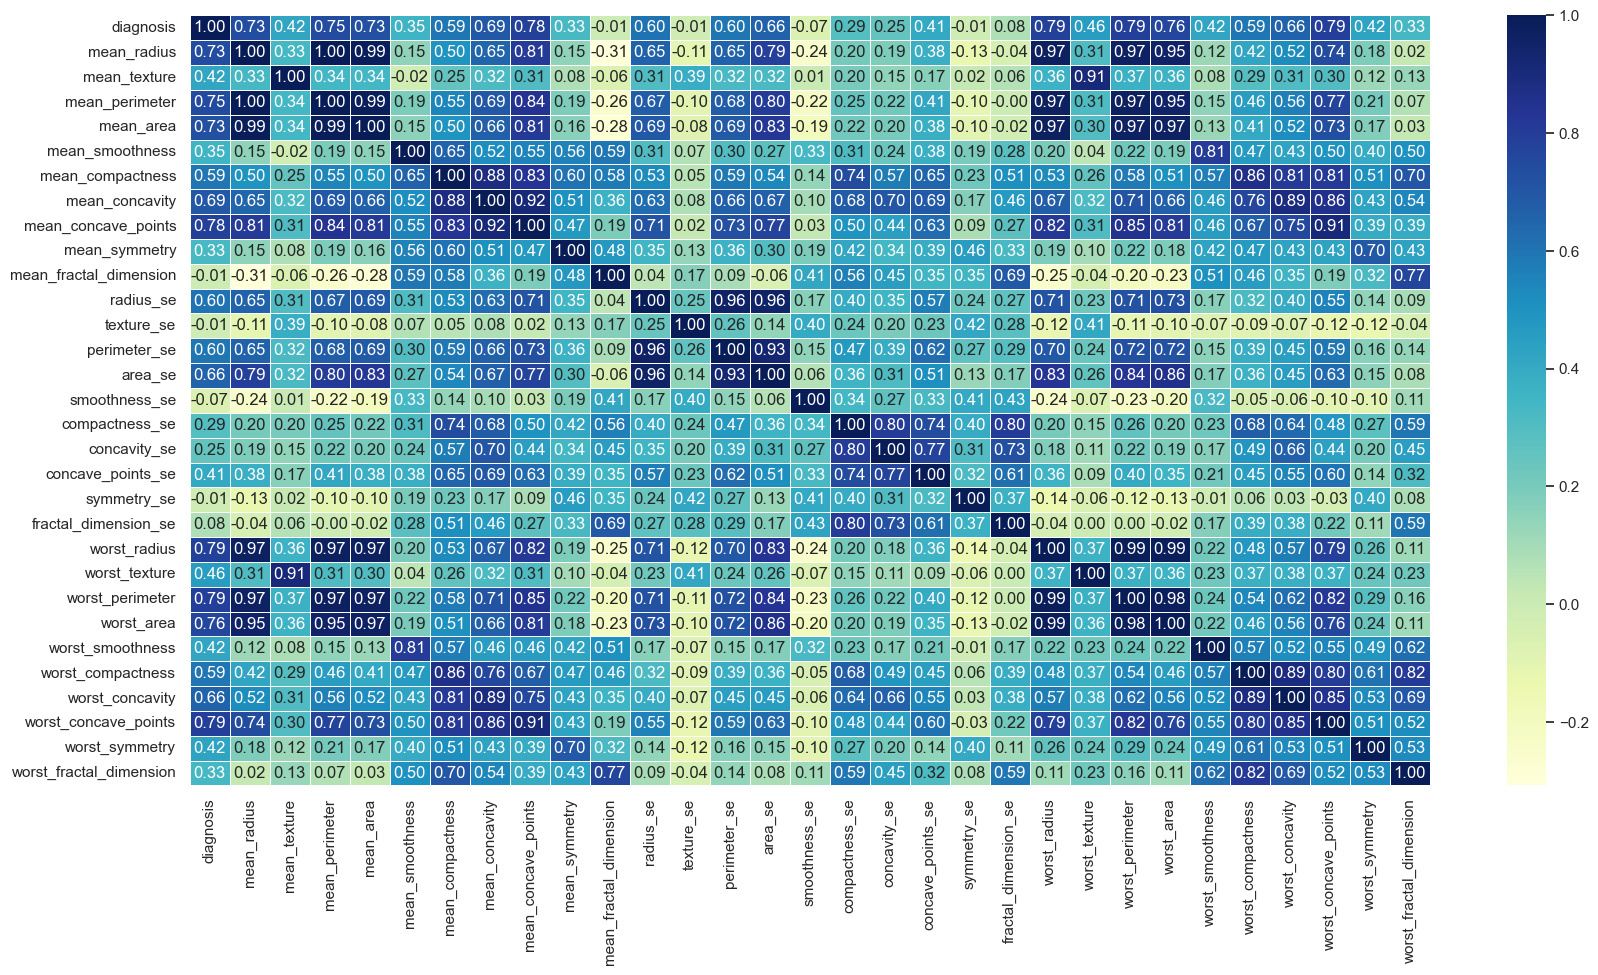

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [316]:
X.drop(['mean_smoothness','mean_fractal_dimension', 'worst_smoothness', 'worst_concavity','worst_concave_points','worst_symmetry','worst_fractal_dimension',
        'mean_compactness','mean_concavity','mean_concave_points','mean_symmetry','radius_se','symmetry_se','worst_compactness','texture_se','smoothness_se'], axis=1, inplace=True)

Prikazujemo broj slučajeva za svaku kategoriju u stupcu "diagnosis" (koji može imati vrijednosti "M" za maligni i "B" za benigni), što nam pomaže da brzo uočimo ravnotežu između tih dviju klasa.

diagnosis
0    357
1    205
Name: count, dtype: int64


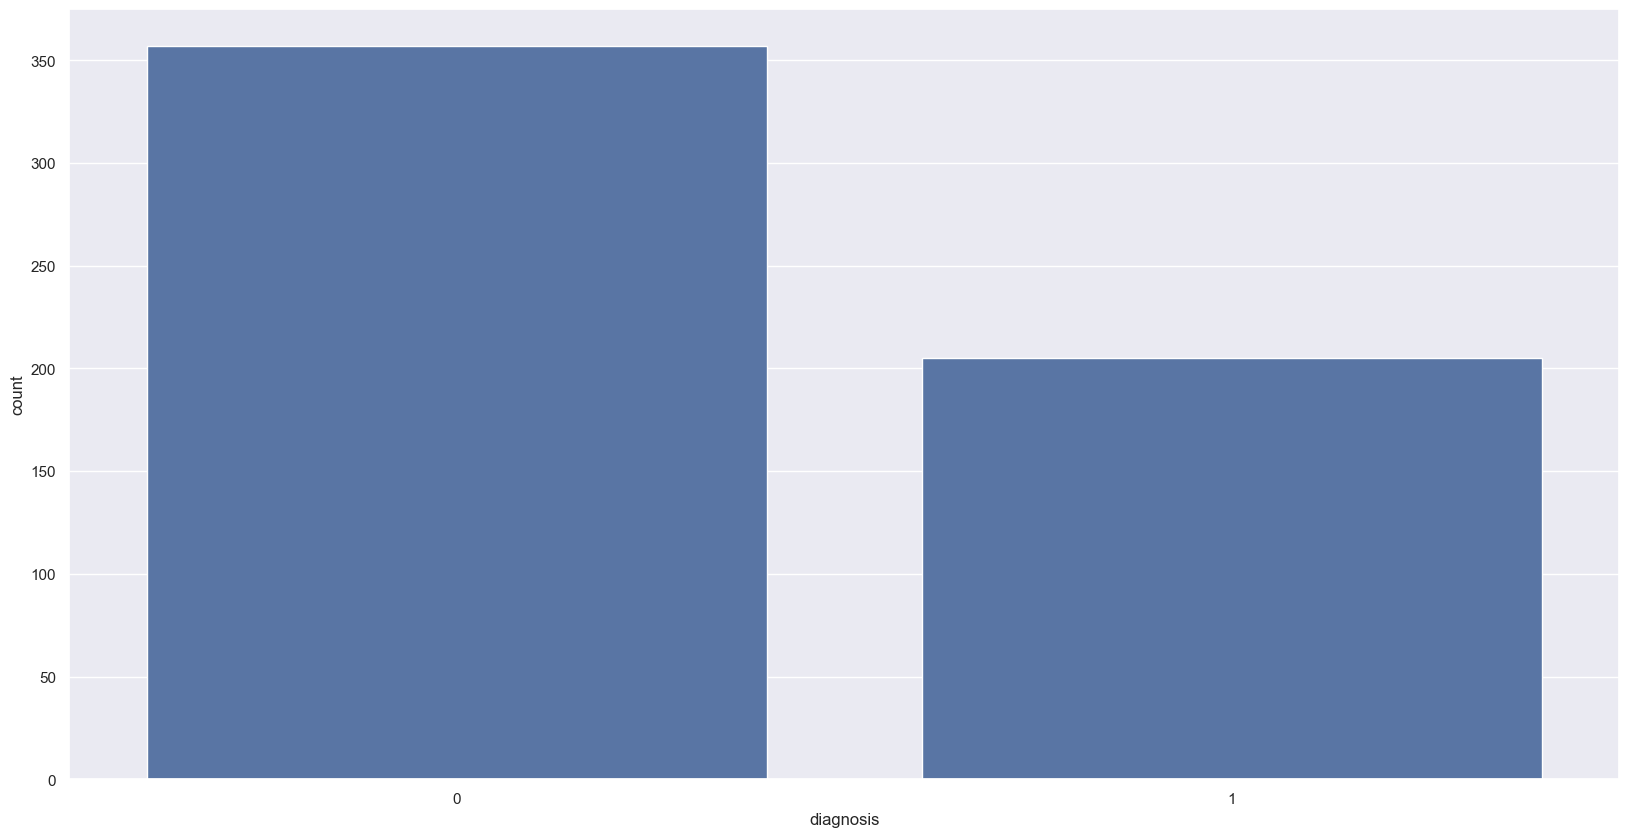

In [317]:
sns.countplot(X, x='diagnosis')
print(X.diagnosis.value_counts())

U ovom dijelu koda generiramo histograme za svaku značajku u skupu podataka kako bismo vizualizirali razlike između benignih i malignih slučajeva. Svaki histogram prikazuje distribuciju vrijednosti za jednu značajku, gdje su benigni slučajevi označeni plavom bojom, a maligni crvenom.

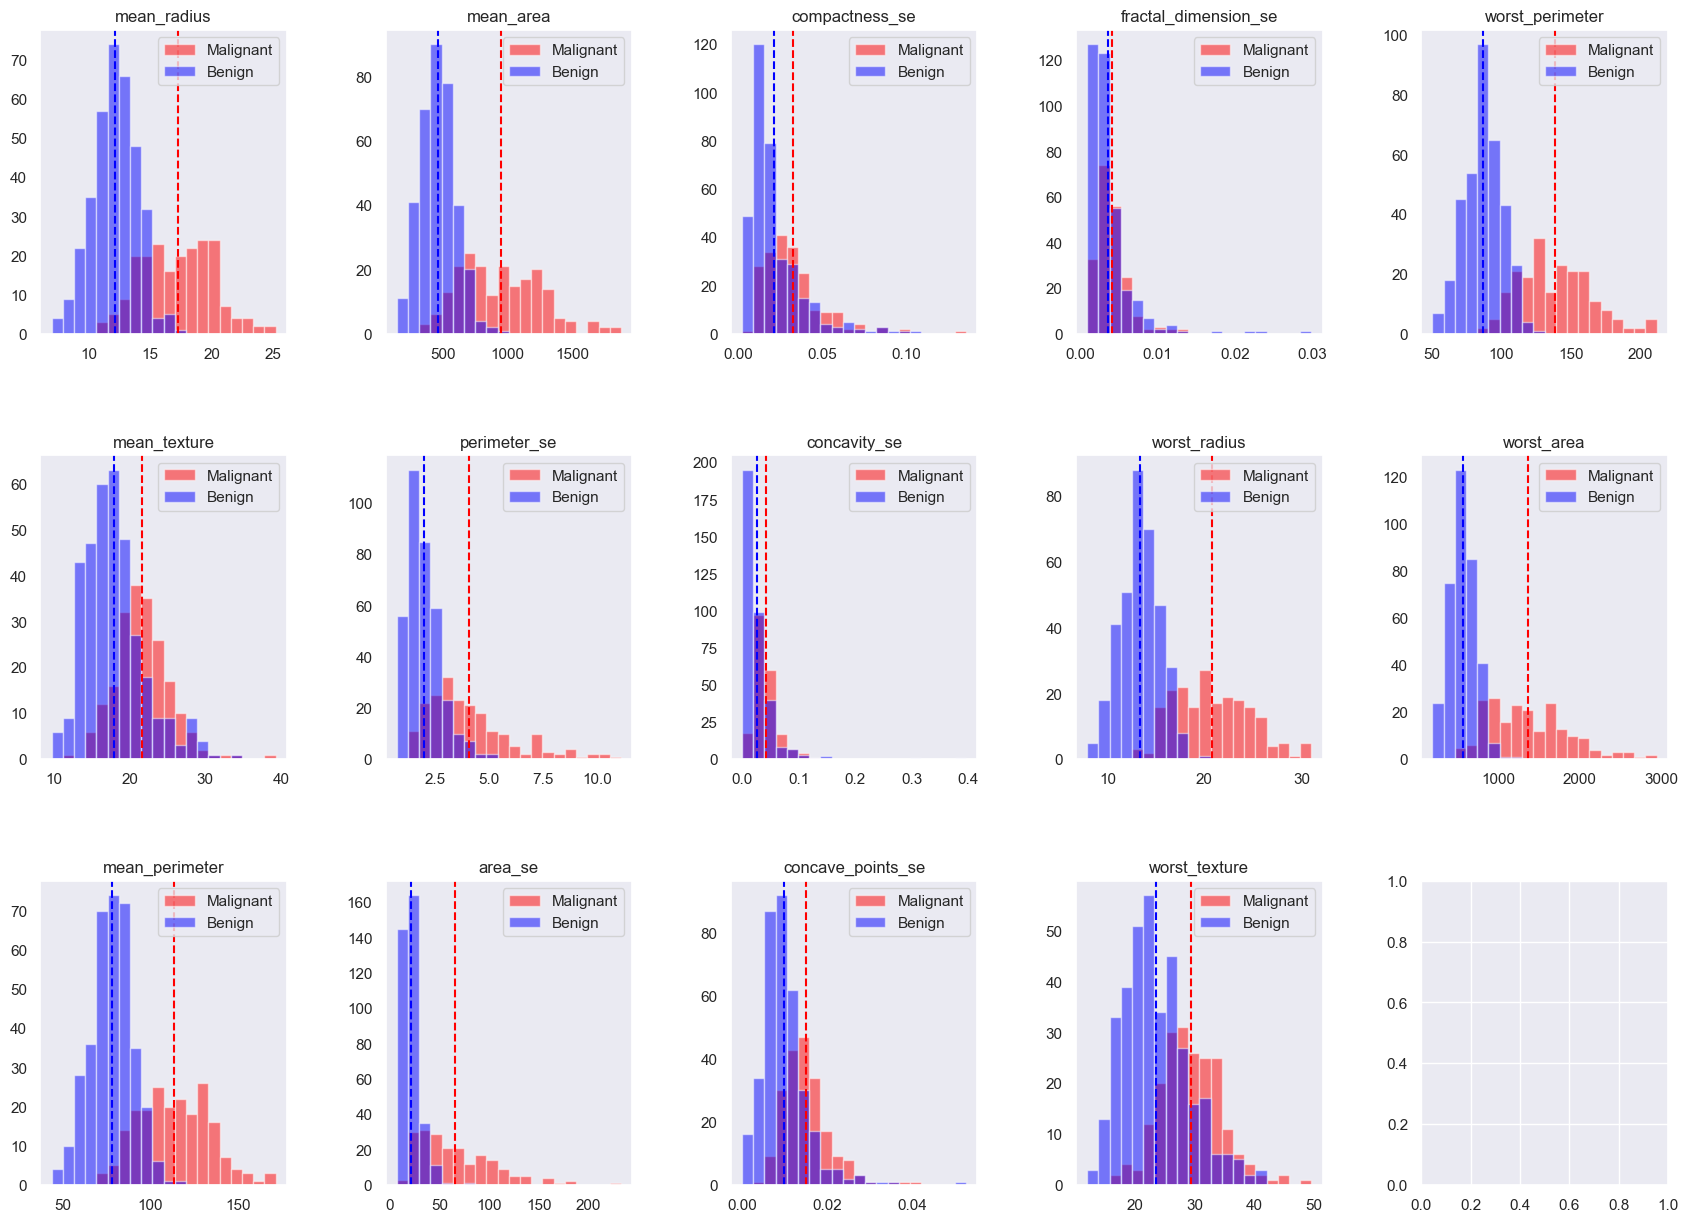

In [318]:
import matplotlib.pyplot as plt

def plot_hist_feature_by_diagnosis(ax, feature_name):
    feature_min = X[feature_name].min() 
    feature_max = X[feature_name].max()
    ax.hist(X.loc[X['diagnosis'] == 1, feature_name], bins=20, alpha=0.5, color='red', label='Malignant', range=(feature_min, feature_max))
    ax.hist(X.loc[X['diagnosis'] == 0, feature_name], bins=20, alpha=0.5, color='blue', label='Benign', range=(feature_min, feature_max))
    ax.axvline(X.loc[X['diagnosis'] == 1, feature_name].mean(), color='red', linestyle='dashed')
    ax.axvline(X.loc[X['diagnosis'] == 0, feature_name].mean(), color='blue', linestyle='dashed')
    ax.set_title(feature_name)
    ax.legend(loc='best')
    ax.grid()
num_features = 14

rows = num_features // 5 + (num_features % 5 != 0) 
cols = 5 

fig, ax = plt.subplots(rows, cols, figsize=(21, rows * 5)) 

for i, column_name in enumerate(X.columns[1:]):  
    plt_row = i % rows
    plt_col = i // rows
    plot_hist_feature_by_diagnosis(ax[plt_row, plt_col], column_name)


plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()



Koristimo sns.pairplot() kako bismo vizualizirali odnose između značajki koje sadrže "mean" u svom imenu, zajedno s dijagnozom. Pomoću ovog grafa prikazujemo parove značajki u obliku dijagrama raspršenja, dok su dijagonale histograme za svaku pojedinu značajku. Boje različitih točaka označavaju različite dijagnoze, što nam omogućava da lako prepoznamo obrasce i razlike između benignih i malignih slučajeva.

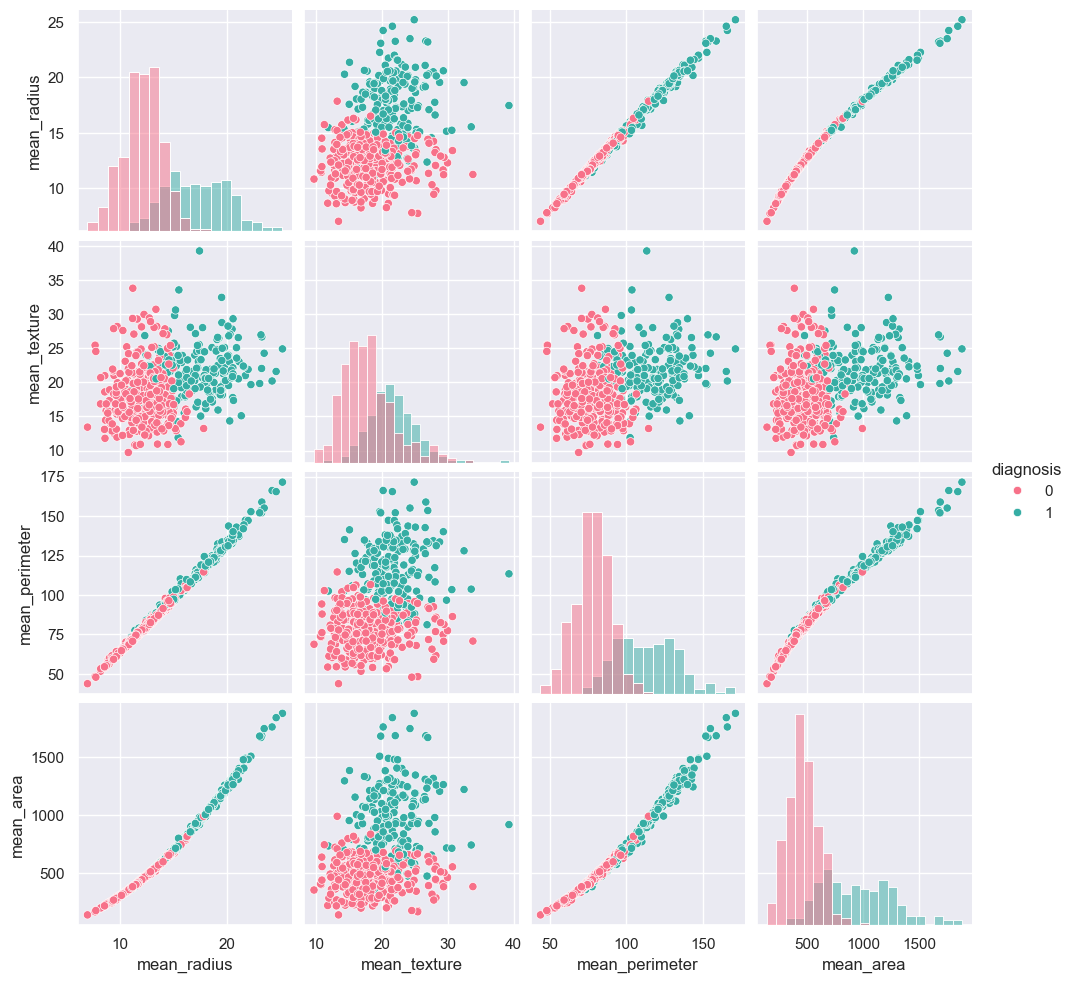

In [319]:
sns.pairplot(X.filter(regex=".*mean|diagnosis", axis=1), hue='diagnosis', diag_kind='hist', palette='husl')

Za svaku značajku koju proučavamo, koristimo scatter plot kako bismo prikazali distribuciju vrijednosti za maligne i benigne tumore.
Scatter plot nam omogućuje da jasno vidimo kako se točke (koje predstavljaju uzorke) raspoređuju za obje kategorije. Na taj način možemo vizualizirati razlike u ponašanju značajki između benignih i malignih tumora.

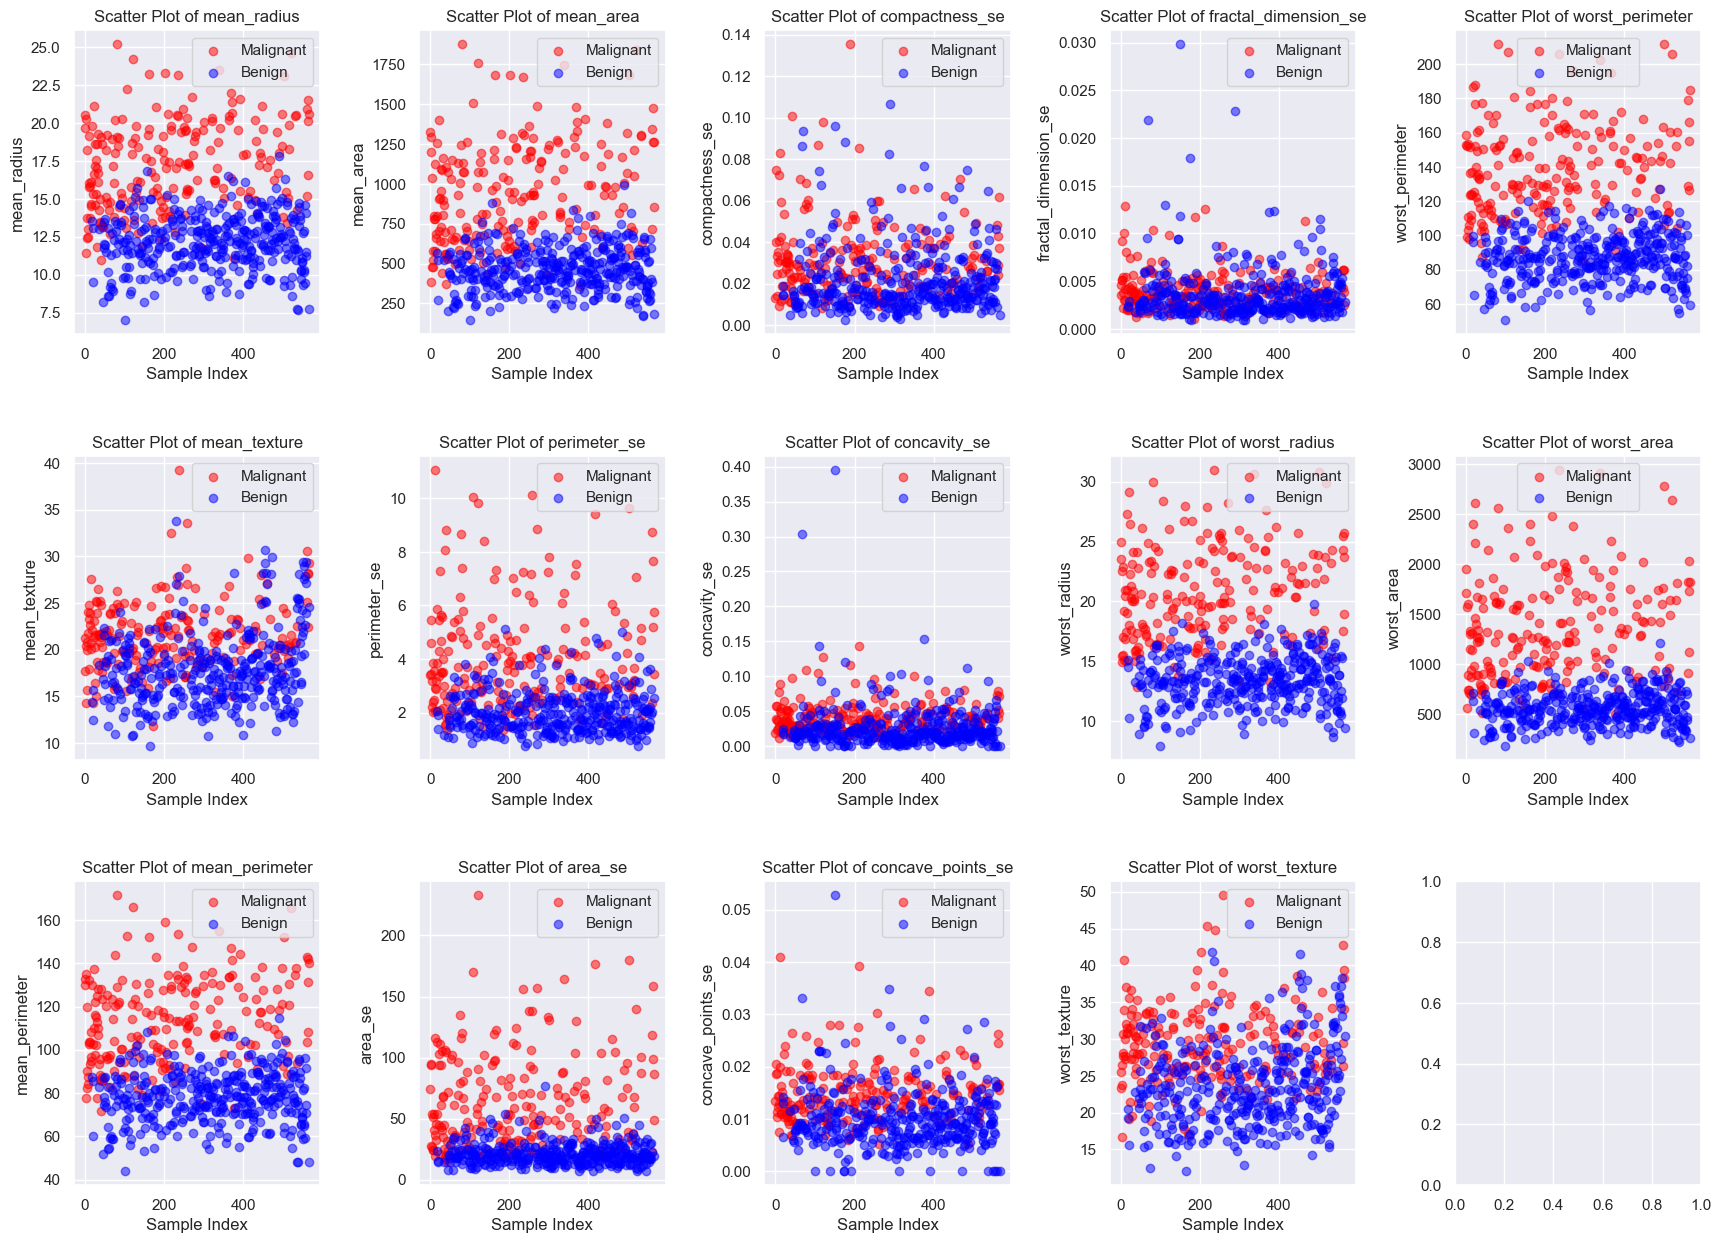

In [320]:
import matplotlib.pyplot as plt

def plot_scatter_feature_by_diagnosis(ax, feature_name):
    malignant = X.loc[X['diagnosis'] == 1, feature_name]
    benign = X.loc[X['diagnosis'] == 0, feature_name]

    ax.scatter(malignant.index, malignant, color='red', alpha=0.5, label='Malignant')
    ax.scatter(benign.index, benign, color='blue', alpha=0.5, label='Benign')

    ax.set_title(f"Scatter Plot of {feature_name}")
    ax.set_xlabel('Sample Index')
    ax.set_ylabel(feature_name)

    ax.legend(loc='best')
    ax.grid(True)
num_features = 14

rows = num_features // 5 + (num_features % 5 != 0) 
cols = 5 

fig, ax = plt.subplots(rows, cols, figsize=(21, rows * 5))

for i, column_name in enumerate(X.columns[1:]):  
    plt_row = i % rows 
    plt_col = i // rows  
    plot_scatter_feature_by_diagnosis(ax[plt_row, plt_col], column_name)

plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()


U idućem korako izrađujemo box plotove. Pomoću box plotova možemo usporediti distribuciju vrijednosti značajki između benignih i malignih tumora, vidjeti razlike u središnjim vrijednostima (medijanima), rasponima te potencijalne ekstremne vrijednosti. To nam može pomoći u identificiranju značajki koje najbolje razlikuju ove dvije kategorije i koje su potencijalno korisne za daljnje analize ili prediktivne modele.

/var/folders/2_/j1l_ycld7kz95x1plfj0s5yw0000gn/T/ipykernel_2852/1994861744.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benign', 'Malignant'])
/var/folders/2_/j1l_ycld7kz95x1plfj0s5yw0000gn/T/ipykernel_2852/1994861744.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benign', 'Malignant'])
/var/folders/2_/j1l_ycld7kz95x1plfj0s5yw0000gn/T/ipykernel_2852/1994861744.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benign', 'Malignant'])
/var/folders/2_/j1l_ycld7kz95x1plfj0s5yw0000gn/T/ipykernel_2852/1994861744.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([

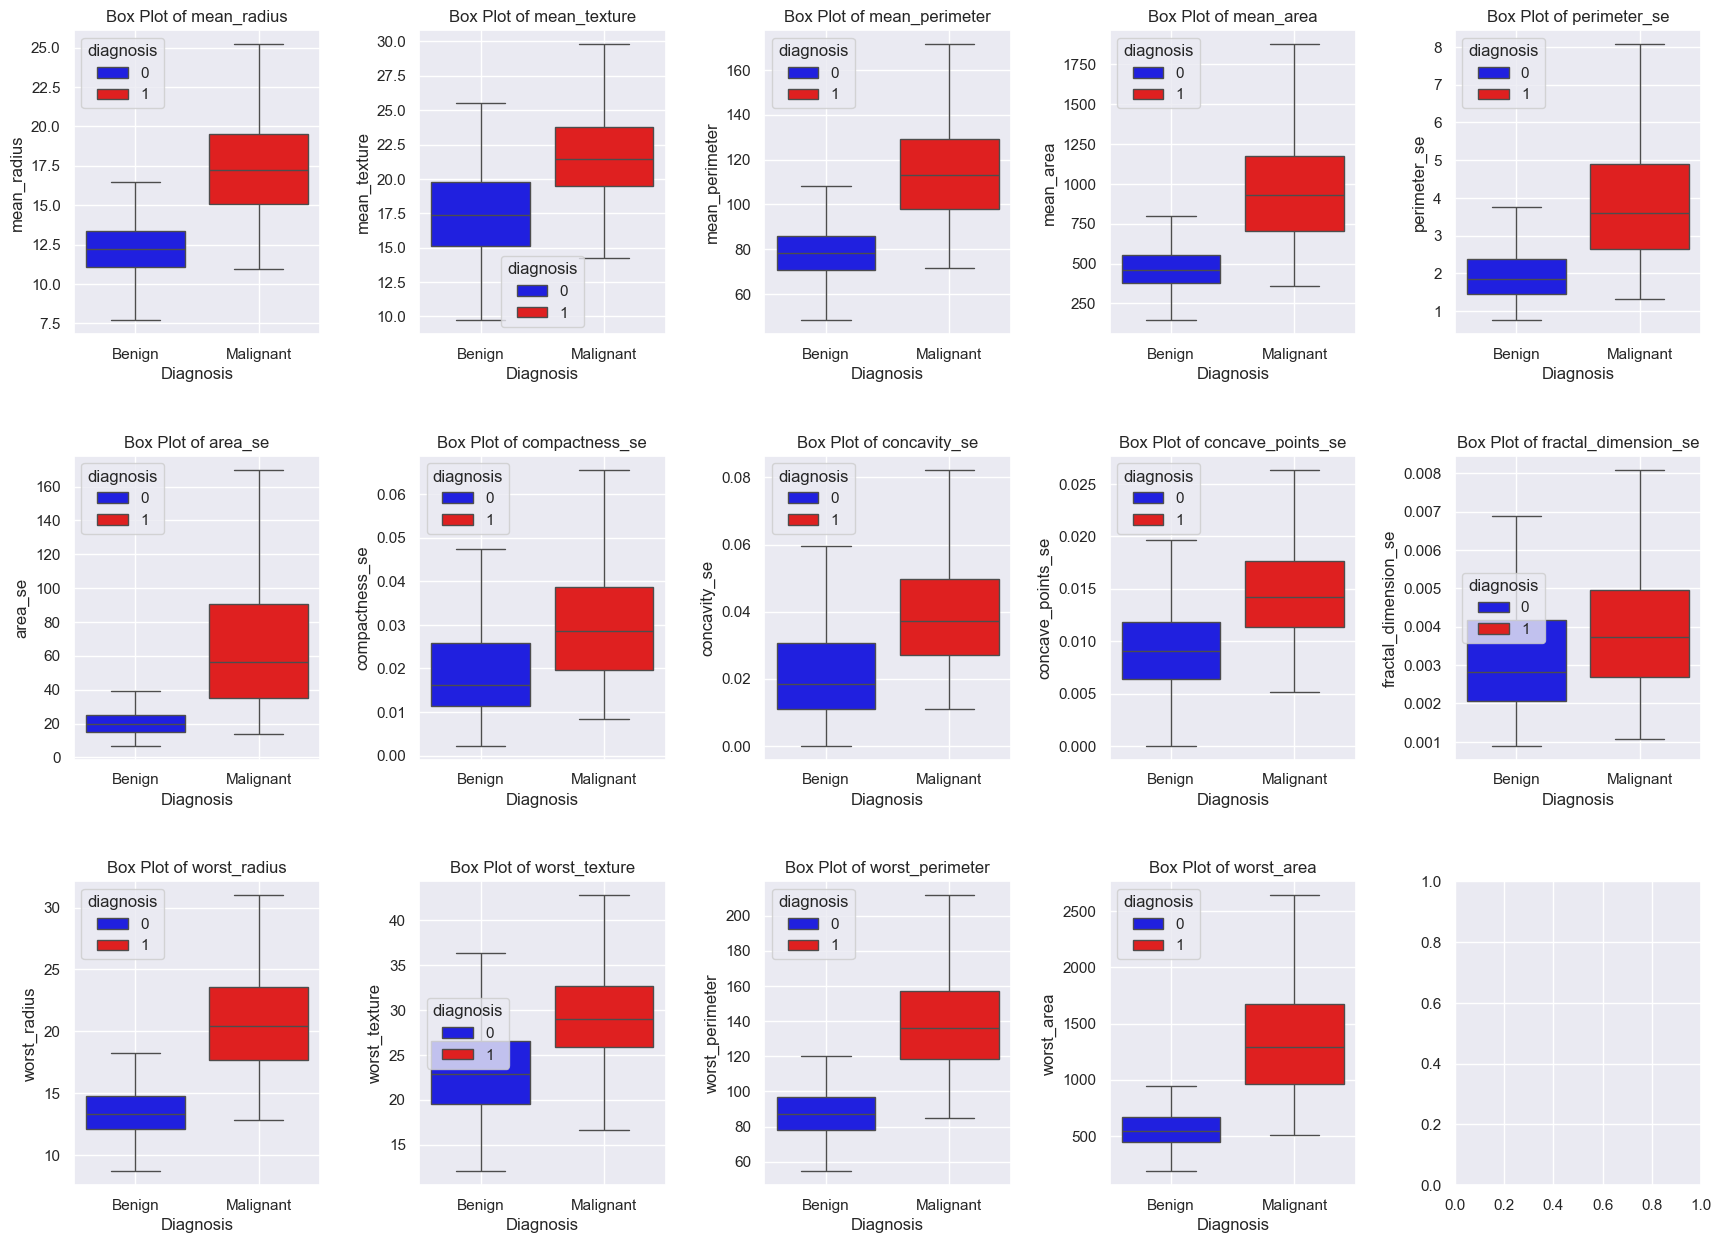

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_feature_by_diagnosis(ax, feature_name):
    X['diagnosis'] = X['diagnosis'].astype(int)

    sns.boxplot(data=X, x='diagnosis', y=feature_name, ax=ax,
                hue='diagnosis', palette={0: 'blue', 1: 'red'}, showfliers=False)
    
    ax.set_title(f"Box Plot of {feature_name}")
    ax.set_xlabel('Diagnosis')
    ax.set_ylabel(feature_name)
    ax.set_xticklabels(['Benign', 'Malignant']) 
    ax.grid(True)

num_features = 14

rows = num_features // 5 + (num_features % 5 != 0)
cols = 5

fig, ax = plt.subplots(rows, cols, figsize=(21, rows * 5))
for i, column_name in enumerate(X.columns[1:]):  
    plt_row = i // cols 
    plt_col = i % cols  
    plot_boxplot_feature_by_diagnosis(ax[plt_row, plt_col], column_name)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

  

In [322]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# podjela skupa X na značajke i izlaz
X_features = X.drop(columns=['diagnosis']) 
y_goal = X['diagnosis'] 

LOGISTIČKA REGRESIJA

Metoda evaluate_and_store_results kreirana je kako bi pojednostavila i standardizirala evaluaciju različitih modela strojnog učenja. Cilj je spremiti metrike poput točnosti, preciznosti, odziva i F1-scorea u strukturiranom formatu radi lakše usporedbe modela.

Zašto smo je napravili?
Usporedba performansi: Omogućuje izračunavanje i spremanje rezultata svih modela na jednom mjestu.
Automatizacija: Izbjegava ponavljanje koda za svaku evaluaciju.
Preglednost: Rezultati se spremaju u tablicu koja je pogodna za analizu, usporedbu i vizualizaciju.

In [323]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 
                                'Train Precision', 'Test Precision', 
                                'Train Recall', 'Test Recall', 
                                'Train F1', 'Test F1', 'Best Params'])

def evaluate_and_store_results(model_name, model, X_train, X_test, y_train, y_test, best_params=None):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average='binary')
    test_precision = precision_score(y_test, y_test_pred, average='binary')
    train_recall = recall_score(y_train, y_train_pred, average='binary')
    test_recall = recall_score(y_test, y_test_pred, average='binary')
    train_f1 = f1_score(y_train, y_train_pred, average='binary')
    test_f1 = f1_score(y_test, y_test_pred, average='binary')
    
    results.loc[len(results)] = [model_name, train_accuracy, test_accuracy, 
                                 train_precision, test_precision, 
                                 train_recall, test_recall, 
                                 train_f1, test_f1, best_params]


In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_features, y_goal, test_size=0.25, random_state=42)

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],              
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear']               
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters for Logistic Regression:", best_params)

best_log_reg = grid_search.best_estimator_

evaluate_and_store_results("Logistic Regression", best_log_reg, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


SVM


In [325]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_features, y_goal, test_size=0.25, random_state=42)

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']  
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters for SVM:", best_params)

best_svm = grid_search.best_estimator_

evaluate_and_store_results("Support Vector Machine (SVM)", best_svm, X_train, X_test, y_train, y_test)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [326]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_features, y_goal, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

evaluate_and_store_results("Random Forest", rf_model, X_train, X_test, y_train, y_test)


In [327]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_goal, test_size=0.25, random_state=42)

nb_model = GaussianNB()
paramsDict = {'var_smoothing': [1e-9,1e-8,1e-7, 1e-6]}


nb_model.fit(X_train, y_train)

evaluate_and_store_results("GaussianNB", nb_model, X_train, X_test, y_train, y_test)


In [328]:

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': range(1, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

evaluate_and_store_results('KNN', best_knn, X_train, X_test, y_train, y_test, grid_search_knn.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [329]:

decision_tree = DecisionTreeClassifier(random_state=42)
param_grid_tree = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4]
              }
grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_tree, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
best_tree = grid_search_tree.best_estimator_

evaluate_and_store_results('Decision Tree', best_tree, X_train, X_test, y_train, y_test, grid_search_tree.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


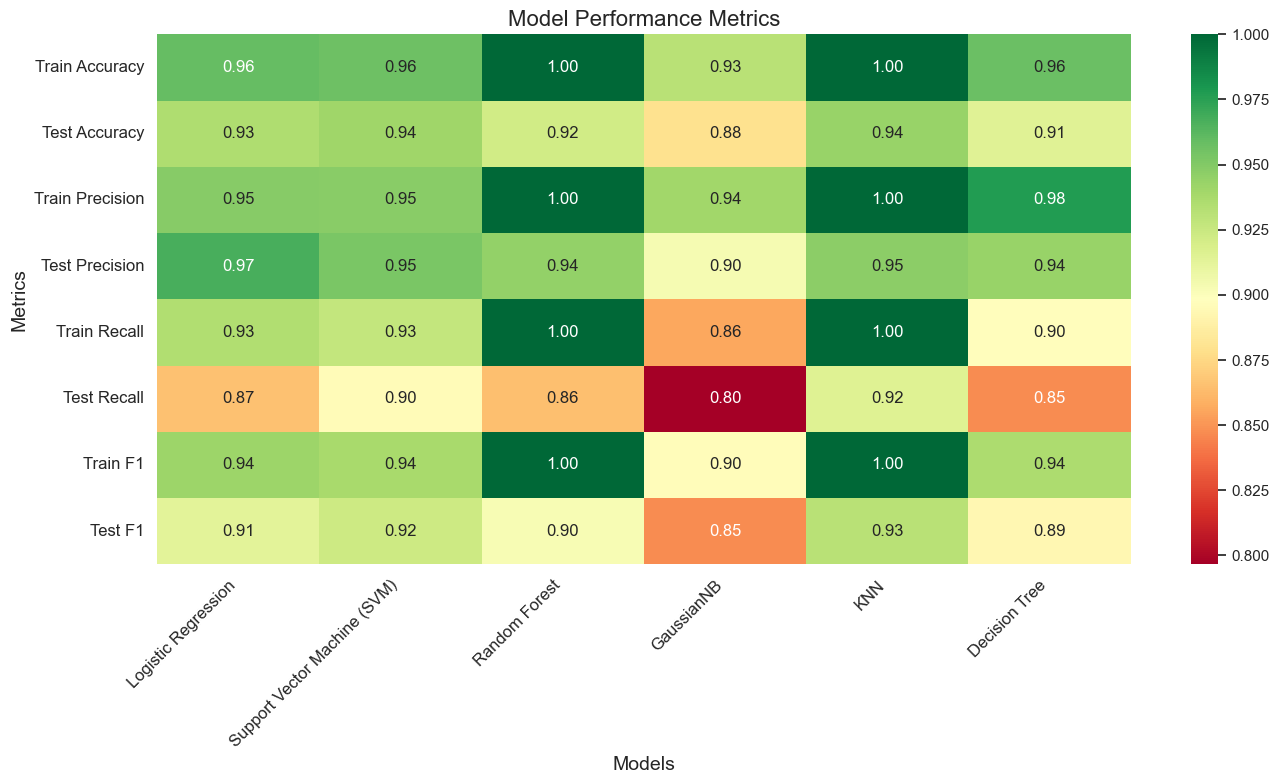

/var/folders/2_/j1l_ycld7kz95x1plfj0s5yw0000gn/T/ipykernel_2852/3721914234.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_numeric.reset_index(), x="Model", y="Test Accuracy", palette="viridis")


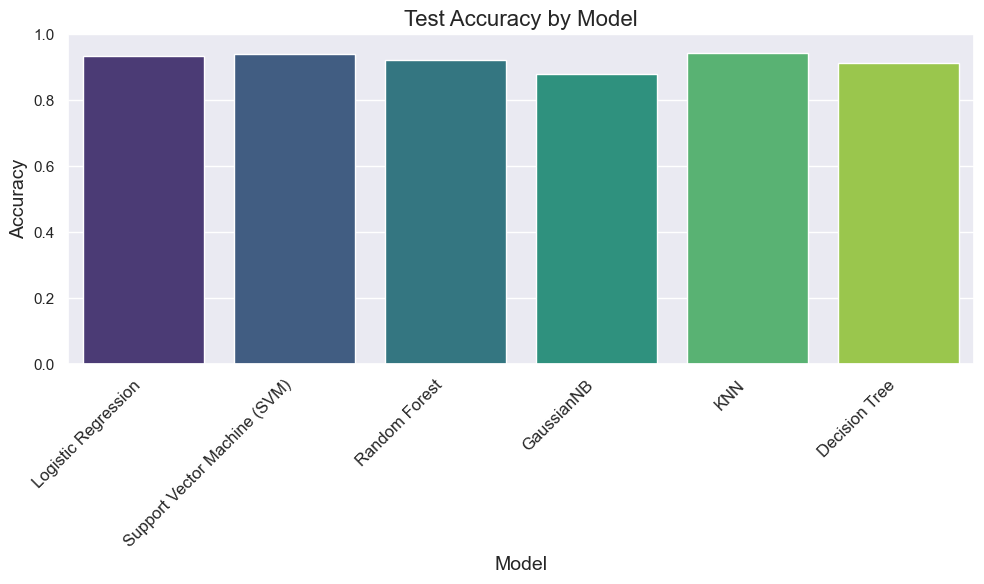

In [330]:


results_df = pd.DataFrame(results)

results_numeric = results_df.drop(columns=["Best Params"], errors='ignore')

results_numeric.set_index("Model", inplace=True)

plt.figure(figsize=(14, 8))
sns.heatmap(results_numeric.T, annot=True, fmt=".2f", cmap="RdYlGn", cbar=True)
plt.title("Model Performance Metrics", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Metrics", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=results_numeric.reset_index(), x="Model", y="Test Accuracy", palette="viridis")
plt.title("Test Accuracy by Model", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1)  # Skala od 0 do 1
plt.tight_layout()
plt.show()


POBOLJŠANJA


Iz dobivene vizualizacije jasno je kako performanse naših modela variraju. Logistic Regression i GaussianNB pokazuju relativno konzistentne rezultate između trening i test skupova, što sugerira bolju generalizaciju i manju sklonost overfittingu. S druge strane, modeli poput Random Foresta, KNN-a i Decision Tree-a postižu savršene performanse na trening skupu, dok na testnom skupu bilježe pad točnosti i ostalih metrika, što jasno upućuje na problem overfittinga. 

Support Vector Machine (SVM) ističe se kao balansiran model s visokim performansama na testnom skupu. Random Forest i Logistic Regression bilježe najviše vrijednosti preciznosti i F1-skora pa su pogodni za zadatke gdje je važna točnost u klasifikaciji.

Kako bismo unaprijedili ukupne performanse naših modela, uvest ćemo ensemble metoda, poput Voting Classifiera, pokušat ćemo kombinirati najbolje karakteristike različitih modela kako bismo poboljšali ukupnu generalizaciju i točnost naših predikcija.

Ovim koracima očekujemo postići bolje rezultate i osigurati pouzdaniju primjenu modela na stvarnim podacima.

In [331]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_features, y_goal, test_size=0.25, random_state=42)

log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
svm = SVC(probability=True, C=1, kernel='rbf', gamma='scale', random_state=42)  # SVM s probability=True za soft voting
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)

# Hard Voting Classifier
hard_voting = VotingClassifier(
    estimators=[('LogReg', log_reg), ('SVM', svm), ('RF', random_forest)],
    voting='hard'
)

# Soft Voting Classifier
soft_voting = VotingClassifier(
    estimators=[('LogReg', log_reg), ('SVM', svm), ('RF', random_forest)],
    voting='soft'
)

stacking = StackingClassifier(
    estimators=[('LogReg', log_reg), ('SVM', svm), ('RF', random_forest)],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)  # finalni model za kombinaciju
)

ensemble_models = {'Hard Voting': hard_voting, 'Soft Voting': soft_voting, 'Stacking': stacking}

results = []
for model_name, model in ensemble_models.items():
    model.fit(X_train, y_train)  
    y_test_pred = model.predict(X_test)  
    
    # Evaluacija performansi
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    results.append({
        'Model': model_name,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1
    })



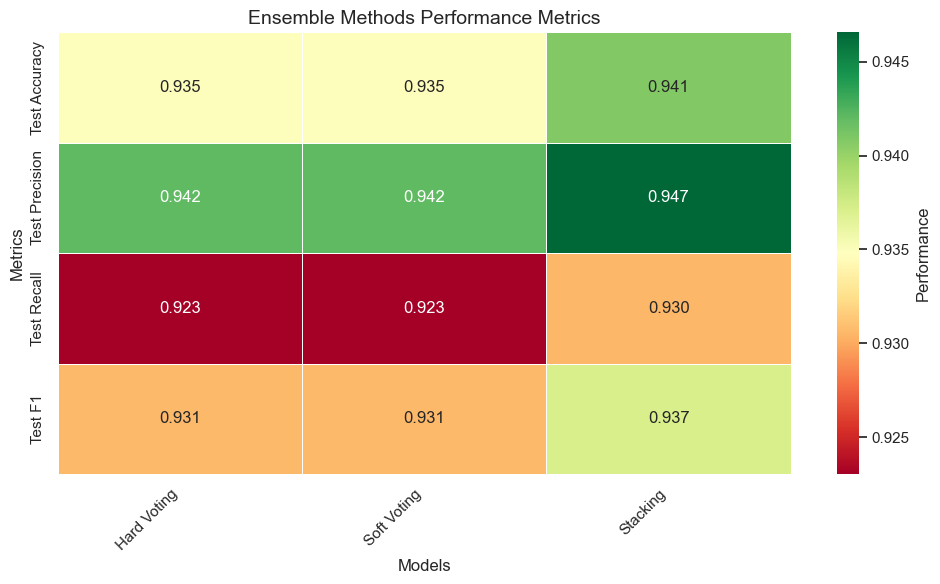

In [332]:

ensemble_results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    ensemble_results_df.set_index("Model").T,
    annot=True,
    cmap="RdYlGn",  # zelene dobre, crvene loše
    cbar_kws={'label': 'Performance'},
    fmt=".3f",
    linewidths=0.5
)
plt.title("Ensemble Methods Performance Metrics", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Metrics", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
